In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the proteins data
ns5 = []
ns5d = []
        
f = open("../../../../../../Data/Proteins/DENV1/NS5/DENV1_NS5.txt", "r")
for x in f:
    if "DSS" in x:
        ns5d.append(1)
    elif "DHF" in x:
        ns5d.append(1)
    elif x[0] == ">":
        ns5d.append(0)
    else:
        x = x.replace("\n", "")
        ns5.append(x)

In [3]:
# Converting the arrays into DataFrames
ns5 = pd.DataFrame(ns5)

# Attaching the "Disease" label column to the input
ns5["Disease"] = ns5d

# Renaming the columns
ns5 = ns5.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
# Concatinating the input data into one DataFrame
print("The combined shape of the given data is:", str(ns5.shape))
print("The length of the combined data is:", str(len(ns5.index)))
print("Does the combined data have any null value? ->", ns5.isnull().values.any())

# Shuffling the data and then taking a peek
ns5 = ns5.sample(frac = 1)
print(ns5.head())

The combined shape of the given data is: (999, 2)
The length of the combined data is: 999
Does the combined data have any null value? -> False
                                              Sequence  Disease
626  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        1
158  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        0
822  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        1
554  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        0
861  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        1


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

ns5['words'] = ns5.apply(lambda x: getKmers(x['Sequence']), axis=1)
ns5 = ns5.drop('Sequence', axis=1)

ns5_texts = list(ns5['words'])
for item in range(len(ns5_texts)):
    ns5_texts[item] = ' '.join(ns5_texts[item])

In [6]:
# Creating y and printing the shape of it
y = ns5.iloc[:, 0].values
print("The shape of y is:", y.shape)

The shape of y is: (999,)


In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(ns5_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (999, 4079)


## Nested Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of C for Logistic Regression
C_list = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10, 100, 1000]
# empty list to store scores
C_scores = []

In [9]:
from sklearn.linear_model import LogisticRegression
# 1. we will loop through reasonable values of k
for c in C_list:
    # 2. run LogisticRegression with C = c
    lr = LogisticRegression(random_state = 0, C = c)
    # 3. obtain cross_val_score for LogisticRegression with C = c
    scores = cross_val_score(lr, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for C = c to C_scores list
    C_scores.append(scores.mean())
    
    print("The score for C  =", c, "is:", scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.0001 is: 0.5975997599759977


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.001 is: 0.5986098609860986


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.01 is: 0.6165094509450946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.1 is: 0.6205599559955995


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.5 is: 0.6175496549654966


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 1.0 is: 0.6185294529452945


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 10 is: 0.6185494549454946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 100 is: 0.6155494549454946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 1000 is: 0.6155595559555956


Length of list 9
Max of list 0.6205599559955995


Text(0, 0.5, 'Cross-validated accuracy')

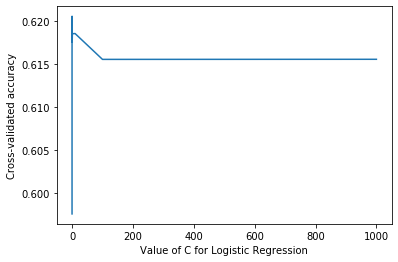

In [10]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(C_scores))
print('Max of list', max(C_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(C_list, C_scores)
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-validated accuracy')